# TFG "Entrenamiento de Redes Convolucionales mediante la Transformada de Fourier"
* Autora: Isabel María Moreno Cuadrado

Se integrará el método de convolución propuesto en la arquitectura de CNN, tal como se ha planteado en la sección teórica. Posteriormente, se realizará una comparación exhaustiva entre esta nueva arquitectura y una arquitectura clásica de CNN, abordando dos problemas distintos de clasificación en el ámbito del DL.

Para cada dataset (MNIST y Fashion-MNIST) se ejecuta el entrenamiento con un modelo de DL sencillo y posteriormente se compara con el entrenamiento de una CNN en el dominio de la frecuencia, con el objetivo de evaluar su viabilidad y rendimiento. Para lograr esto, se ha desarrollado una implementación personalizada que realiza dicho entrenamiento para una arquitectura similar a la utilizada anteriormente. Esta implementación es un primer paso dentro de la línea de investigación propuesta en este trabajo. Se centra en aplicar la FFT a las entradas y realizar las operaciones convolucionales en el dominio de la frecuencia, lo que podría potencialmente reducir el costo computacional y mejorar la eficiencia.

Adaptar todo el proceso de entrenamiento a este nuevo dominio ha sido un desafío significativo y ha requerido una considerable cantidad de tiempo y esfuerzo. La transformación de datos, la redefinición de operaciones convolucionales y la integración con las técnicas de aprendizaje profundo existentes han presentado múltiples obstáculos técnicos.

Entre otras tareas, ha sido necesario redefinir algunas de las capas que componen la arquitectura de una CNN para que puedan operar con números complejos. Todo esto se encuentra detallado en la memoria del TFG.

# PROCEDIMIENTO DE VALIDACIÓN EXPERIMENTAL
Para cada dataset se reserva un 20\% de los datos de entrenamiento para validación. En este conjunto de datos de validación se mide el rendimiento del modelo durante el proceso de entrenamiento. La validación ayuda a ajustar los hiperparámetros del modelo y a prevenir el sobreajuste. Esto asegura que el modelo generalice bien a datos nuevos e invisibles, mejorando su capacidad para hacer predicciones precisas en situaciones del mundo real.


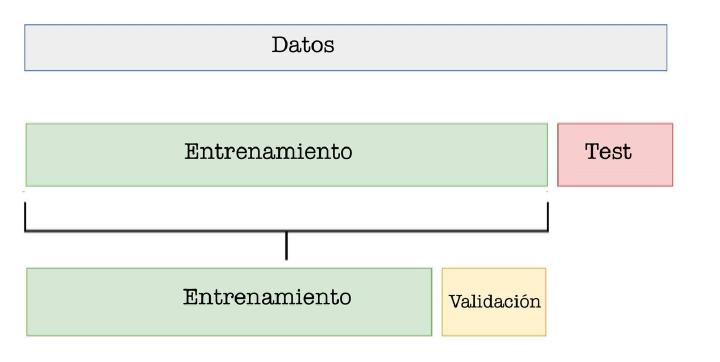

Las comparaciones entre modelos se realizarán en validación para evitar caer en "Data Snooping".

## Función de Pérdida

La función de pérdida guía el proceso de entrenamiento del modelo, indicando cómo ajustar los pesos del mismo para minimizar el error de predicción.

Se usará la entropía cruzada, que es una función de pérdida utilizada principalmente en problemas de clasificación multiclase. Mide la diferencia entre la distribución de probabilidad verdadera y la distribución de probabilidad predicha por el modelo. La fórmula es la siguiente:

\begin{equation}
 L = -\sum_{i=1}^{N} \sum_{c=1}^{C} y_{i,c} \log(\hat{y}_{i,c})
\end{equation}

donde:
- $ N $ es el número de muestras.
- $ C $ es el número de clases.
- $ y_{i,c} $ es la etiqueta verdadera (1 si la muestra $ i $ pertenece a la clase $ c $, de lo contrario 0).
- $ \hat{y}_{i,c} $ es la probabilidad predicha de la muestra $ i $ para la clase $ c $.

## Métricas de Rendimiento

Para medir el rendimiento de un modelo de clasificación, es fundamental presentar ciertos conceptos básicos que describen los diferentes tipos de resultados de predicción.

- **Verdaderos Positivos (TP):** Las instancias correctamente clasificadas como positivas.
- **Falsos Positivos (FP):** Las instancias incorrectamente clasificadas como positivas.
- **Verdaderos Negativos (TN):** Las instancias correctamente clasificadas como negativas.
- **Falsos Negativos (FN):** Las instancias incorrectamente clasificadas como negativas.

En base a estos se pueden definir diversas métricas evaluación para medir el rendimiento del modelo. Cada métrica proporciona información específica sobre diferentes aspectos. A continuación se describen algunas de las métricas más comunes para un problema de clasificación.

- **Accuracy:**
  Es una métrica que mide la proporción de predicciones correctas realizadas por un modelo sobre el total de predicciones realizadas. Matemáticamente, se calcula como la suma de predicciones correctas dividida por el número total de predicciones. Sin embargo, esta métrica puede ser engañosa si hay un desequilibrio entre las clases objetivo, ya que puede dar una impresión falsa de la calidad del modelo.
  
  \begin{equation}
  \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
  \end{equation}

- **Precisión:**
  La precisión mide la proporción de verdaderos positivos entre todas las predicciones positivas.
  
  \begin{equation}
  \text{Precisión} = \frac{TP}{TP + FP}
  \end{equation}

- **Exhaustividad:**
  La exhaustividad mide la proporción de verdaderos positivos entre todas las muestras que son realmente positivas.
  
  \begin{equation}
  \text{Exhaustividad} = \frac{TP}{TP + FN}
  \end{equation}

- **F1-Score:**
  El F1-Score es una métrica que combina precisión y recuperación en una sola medida. Es especialmente útil cuando hay un desequilibrio entre las clases objetivo, ya que tiene en cuenta tanto los falsos positivos como los falsos negativos. El F1-Score se calcula como la media armónica de precisión y recuperación.
  
  \begin{equation}
  F1 = 2 \cdot \frac{\text{Precisión} \cdot \text{Sensibilidad}}{\text{Precisión} + \text{Sensibilidad}}
  \end{equation}

Por último, se empleará el tiempo, como métrica, dado que el propósito de adoptar una implementación alternativa tiene como objetivo específicamente estudiar el aceleramiento en el proceso de entrenamiento de las CNN.


# MNIST

El dataset MNIST es uno de los conjuntos de datos más utilizados por los usuarios que comienzan a realizar pruebas con herramientas de AA debido a la facilidad de comprensión de los problemas que ofrece su uso. MNIST es un subconjunto de dígitos escritos a mano basado en otro conjunto más grande, llamado NIST . Consta de 70,000 imágenes, 60,000 para entrenamiento y 10,000 para test. Las imágenes de la base de datos NIST están en blanco y negro y tienen un tamaño de 20x20 píxeles, pero el subconjunto de imágenes de MNIST se normalizó y se suavizó, lo que provocó que pasasen a ser de 28x28 píxeles y se introdujesen niveles de escala de grises. Las imágenes se dividen en 10 categorías, correspondientes a los números del 0 al 9, escritos a mano alzada.

El uso de MNIST ha sido fundamental en la investigación y desarrollo de técnicas avanzadas de DL, como las CNN. A lo largo de los años, ha servido como un estándar de referencia para evaluar y comparar el rendimiento de nuevos métodos y arquitecturas en tareas de reconocimiento de patrones y clasificación.

El modelo que usaremos será el siguiente: MNIST: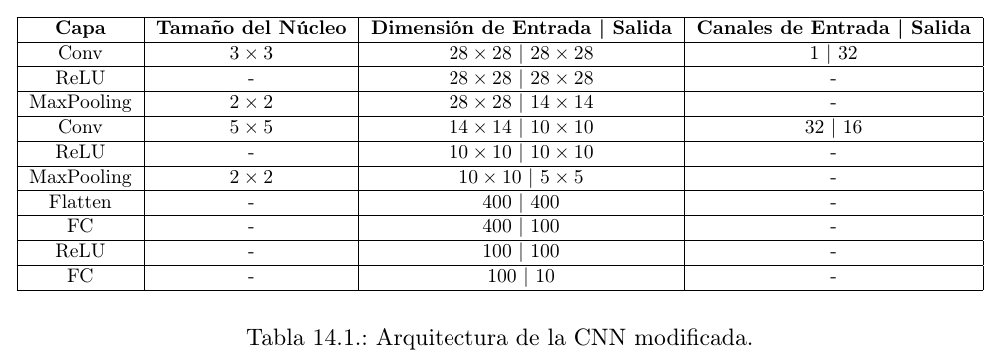

In [ ]:
!pip install keras-tuner tensorflow scikit-learn

Para optimizar los hiperparámetros de nuestro modelo, ejecutamos un grid search utilizando Keras Tuner. Keras Tuner es una biblioteca que facilita la búsqueda de los mejores hiperparámetros para modelos de Keras, permitiendo mejorar significativamente el rendimiento del modelo. Concretamente vamos a centrarnos a la **tasa de aprendizaje** y el **tamaño de batch**.

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Cargar el conjunto de datos MNIST
(features, labels), (testFeatures, testLabels) = mnist.load_data()

# Normalizar las características (imágenes) a valores en el rango [0, 1]
features = features.astype('float32') / 255.0
testFeatures = testFeatures.astype('float32') / 255.0

# Añadir una dimensión para el canal (ya que las imágenes son en escala de grises)
features = np.expand_dims(features, axis=-1)
testFeatures = np.expand_dims(testFeatures, axis=-1)

# Convertir las etiquetas a formato one-hot
labels = to_categorical(labels, 10)
testLabels = to_categorical(testLabels, 10)

train_features, val_features, train_labels, val_labels = train_test_split(features, labels, test_size=0.2, random_state=42)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import EarlyStopping, Callback
from keras.optimizers import AdamW
import keras_tuner as kt
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Definir el modelo Keras como una función para KerasTuner
def build_model(hp):
    input_shape = (28, 28, 1)
    num_classes = 10

    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(16, kernel_size=(5, 5), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")
    batch_size = hp.Choice("batch_size", values=[16, 32, 64])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Definir el tuner para Random Search
random_search_tuner = kt.RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=4,
    overwrite=True,
    directory="my_mnist_dir",
    project_name="my_mnist_rnd_search",
    seed=42
)

# Callback para early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Ejecutar el grid search
random_search_tuner.search(train_features, train_labels, epochs=8, validation_data=(val_features, val_labels), callbacks=[early_stopping])

# Obtener el mejor modelo
top3_models = random_search_tuner.get_best_models(num_models=3)

# Obtener los mejores hiperparámetros
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
print("Best hyperparameters:", top3_params[0].values)  # best hyperparameter values

# Clase para calcular el F1-score en el conjunto de validación
class F1ScoreCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        val_predict = np.argmax(self.model.predict(self.validation_data[0]), axis=1)
        val_targ = np.argmax(self.validation_data[1], axis=1)
        _val_f1 = f1_score(val_targ, val_predict, average='macro')
        print(f" — val_f1: {_val_f1}")
        logs['val_f1'] = _val_f1

Trial 4 Complete [00h 01m 02s]
val_accuracy: 0.9897500276565552

Best val_accuracy So Far: 0.9897500276565552
Total elapsed time: 00h 04m 31s
Best hyperparameters: {'learning_rate': 0.0006562536901904111, 'batch_size': 16}


In [ ]:
!pip install keras-tuner tensorflow scikit-learn

In [ ]:
best_model = top3_models[0]
top3_models[0].summary()
best_batch_size = top3_params[0].get('batch_size')
lr = top3_params[0].get('learning_rate')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        12816     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               7

Reentrenamos el modelo completo con los parámetos que hemos encontrado

In [ ]:
input_shape = (28, 28, 1)
model = Sequential()
model.add(Input(shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=lr),
    loss='categorical_crossentropy',
    metrics=['accuracy',tf.keras.metrics.F1Score()]
)

In [ ]:
import warnings

# Suprimir warnings de Python
warnings.filterwarnings('ignore')

# Configurar el nivel de log de TensorFlow
tf.get_logger().setLevel('ERROR')

In [ ]:
# Entrenar el mejor modelo
history = model.fit(
    train_features, train_labels,
    batch_size=best_batch_size,
    epochs=15,
    verbose=1,
    validation_data=(val_features, val_labels),
    callbacks=[early_stopping]
)

Epoch 1/15
3000/3000 [==============================] - 28s 9ms/step - loss: 0.1583 - accuracy: 0.9517 - f1_score: 0.9513 - val_loss: 0.0608 - val_accuracy: 0.9808 - val_f1_score: 0.9807
Epoch 2/15
3000/3000 [==============================] - 23s 8ms/step - loss: 0.0524 - accuracy: 0.9834 - f1_score: 0.9833 - val_loss: 0.0417 - val_accuracy: 0.9878 - val_f1_score: 0.9877
Epoch 3/15
3000/3000 [==============================] - 15s 5ms/step - loss: 0.0373 - accuracy: 0.9879 - f1_score: 0.9879 - val_loss: 0.0426 - val_accuracy: 0.9875 - val_f1_score: 0.9874
Epoch 4/15
3000/3000 [==============================] - 16s 5ms/step - loss: 0.0270 - accuracy: 0.9912 - f1_score: 0.9912 - val_loss: 0.0375 - val_accuracy: 0.9891 - val_f1_score: 0.9890
Epoch 5/15
3000/3000 [==============================] - 15s 5ms/step - loss: 0.0206 - accuracy: 0.9935 - f1_score: 0.9934 - val_loss: 0.0330 - val_accuracy: 0.9897 - val_f1_score: 0.9896
Epoch 6/15
3000/3000 [==============================] - 16s 5ms/s


Si se analiza el conjunto de validación, se observa que tanto el accuracy como el F1-score tienen valores altos, lo cual indica que el modelo está realizando predicciones precisas y equilibradas. En cuanto al tiempo de entrenamiento, este ha sido de aproximadamente `3 minutos`, lo cual es un tiempo más que aceptable dada la simplicidad del problema.

Se presentan las curvas de aprendizaje y las métricas clave, proporcionando una visión detallada del proceso de aprendizaje del modelo. A partir de la décima época, se observa que el modelo comienza a sobreajustarse. Esto se evidencia por el aumento del error en el conjunto de validación a partir de ese punto.

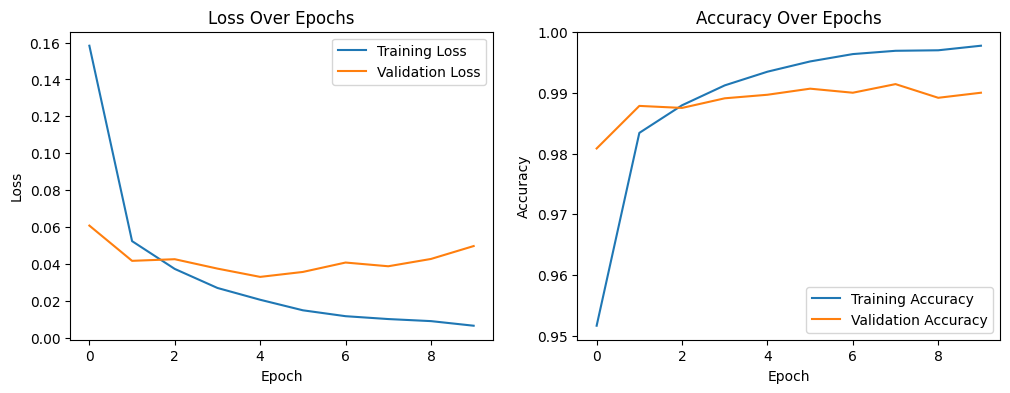

In [ ]:
# Graficar pérdidas y precisión
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.show()

In [ ]:
from sklearn.metrics import f1_score
import numpy as np

# Evaluar el modelo en el conjunto de test
score_adamw = model.evaluate(testFeatures, testLabels, verbose=0)
print('AdamW pérdida en Test:', score_adamw[0])
print('AdamW Test accuracy:', score_adamw[1])
print('AdamW Test F1-Score:', score_adamw[2])

# Calcular el F1-Score en el test
y_pred_adamw = model.predict(testFeatures)
# Otra forma de calcular el accuracy en test


AdamW pérdida en Test: 0.031063271686434746
AdamW Test accuracy: 0.9894999861717224
AdamW Test F1-Score: [0.9918699  0.9947183  0.9854086  0.9892051  0.99187    0.98985344
 0.9905462  0.98776305 0.9846939  0.98859686]
313/313 [==============================] - 1s 3ms/step


Se aplica ahora el modelo al conjunto de Test. Estos resultados están en línea con lo observado durante la validación, siendo muy satisfactorios ya que se supera el 98\% en ambas métricas.

In [ ]:
def plot_confusion_matrix(conf_matrix, title='Confusion Matrix'):
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

def plot_misclassified_images(x_data, y_true, y_pred, title='Misclassified Images'):
    misclassified_indexes = np.where(y_true != y_pred)[0]
    plt.figure(figsize=(15, 5))
    for i, mis_idx in enumerate(misclassified_indexes[:10]):  # Mostrar solo los primeros 10
        plt.subplot(2, 5, i + 1)
        plt.imshow(np.squeeze(x_data[mis_idx]), cmap='gray')
        plt.title(f'Pred: {y_pred[mis_idx]}, True: {y_true[mis_idx]}')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()


Si se atiende a la matriz de confusión en la siguiente figura, correspondiente al conjunto de prueba,  esta permite identificar y analizar los errores más comunes cometidos por el modelo. La matriz de confusión es una herramienta esencial para comprender en detalle el rendimiento del modelo, ya que muestra no solo la cantidad de aciertos, sino también los tipos específicos de errores que se han producido.

Cada celda de la matriz indica el número de predicciones realizadas por el modelo para cada clase, proporcionando una visión clara de cuántos ejemplos fueron correctamente clasificados y cuántos fueron mal clasificados en cada categoría. Este análisis detallado ayuda a identificar patrones en los errores, como clases que el modelo tiende a confundir con mayor frecuencia, y proporciona una base sólida para implementar mejoras y ajustes en el modelo.  Como era de esperar, la mayor debilidad del modelo se encuentra en la diferenciación de los dígitos que tienen trazos similares. Específicamente, los dígitos 4 y 9, 2 y 7, así como 6 y 0, son los más propensos a ser confundidos. Estas combinaciones presentan un desafío particular debido a sus características visuales compartidas.

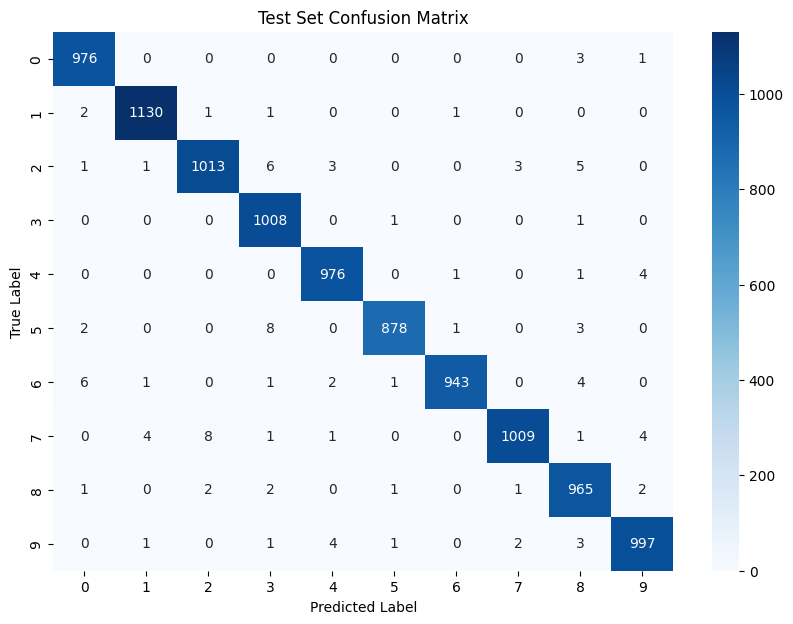

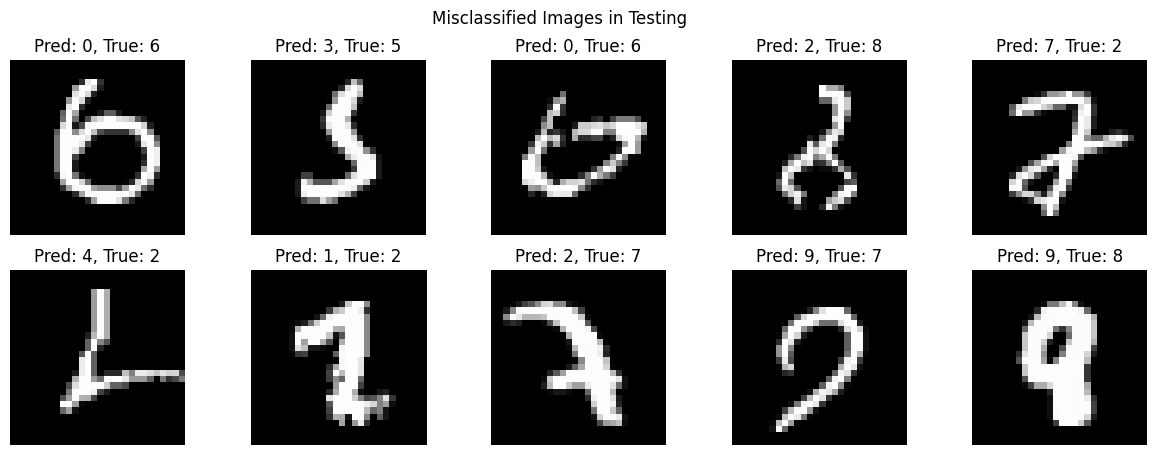

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns  # Para visualizar la matriz de confusión

y_pred_test_classes = np.argmax(y_pred_adamw, axis=1)
y_true_test = np.argmax(testLabels, axis=1)


conf_matrix_test = confusion_matrix(y_true_test, y_pred_test_classes)

# Mostrar matrices de confusión
plot_confusion_matrix(conf_matrix_test, title='Test Set Confusion Matrix')

plot_misclassified_images(testFeatures, y_true_test, y_pred_test_classes, 'Misclassified Images in Testing')


Por último, en la imagen anterior se muestran algunas de las imágenes que el modelo ha clasificado incorrectamente. Esta visualización permite analizar los errores más comunes y comprender mejor las limitaciones del modelo. Esta información ya había sido identificada mediante la matriz de confusión. Sin embargo, puede resultar interesante visualizar estos casos para determinar si realmente existe algún tipo de ambigüedad o para comprender mejor el origen de la confusión.
Se muestra, por ejemplo, en la tercera imagen de la primera fila, que clasificar la imagen es complicado hasta para un experto por la similitud del trazo tanto con el dígito 6 como el dígito 0.

La tarea de clasificación de dígitos del conjunto de datos MNIST es relativamente sencilla y, con la CNN seleccionada, se obtienen resultados considerablemente buenos.


# ENTRENAMIENDO DE UNA CNN MNIST

Los hiperparámetros fueron seleccionados mediante un proceso manual de búsqueda exhaustiva (grid search), escogiendo aquellos que ofrecían el mejor rendimiento para el problema en cuestión. Se inició con un *learning rate* bastante bajo, de $10^{-6}$, y se fue incrementando gradualmente en factores de 10, es decir, a $10^{-5}$, $10^{-4}$, etc., observando detenidamente cómo afectaba cada cambio al comportamiento del modelo durante la validación. Este método permitió identificar el valor óptimo de *learning rate* que equilibra eficientemente la velocidad de convergencia y la precisión del modelo sin caer en sobreajuste o divergencia en los resultados de validación.


In [ ]:
import numpy as np
import random
import tensorflow.compat.v1 as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import time
from sklearn.metrics import accuracy_score, f1_score

tf.disable_v2_behavior()
tf.compat.v1.disable_resource_variables()

# Imprimir las formas de los datos para confirmar la carga y preprocesamiento
print(f"Training data shape: {features.shape}")
print(f"Training labels shape: {labels.shape}")
print(f"Test data shape: {testFeatures.shape}")
print(f"Test labels shape: {testLabels.shape}")

# Set the parameters:
NumClasses = 10
BatchLength = 60
Size = [28, 28, 1]
NumEpochs = 10
LearningRate = 1e-3
NumKernels = [16, 32]

# Spectral pooling size:
specPoolSize = 0

# Early stopping parameters
early_stopping_patience = 3
best_val_loss = float('inf')
patience_counter = 0

Definimos todas las capas tal y como se describe en la memoria

In [ ]:
def fourier_complex_relu(x):
    real = tf.real(x)
    imag = tf.imag(x)
    return tf.complex(tf.cast(real * real + imag * imag > 0.1, tf.float32) * real,
                      tf.cast(real * real + imag * imag > 0.1, tf.float32) * imag)

def convolution_in_freq_domain_without_ifft(f_input, out_channels):
    in_shape = f_input.get_shape()
    bias_r = tf.get_variable('BiasReal', [out_channels], dtype=tf.float32)
    bias_c = tf.get_variable('BiasComp', [out_channels], dtype=tf.float32)
    bias = tf.complex(bias_r, bias_c)
    if specPoolSize == 0:
        f_input = tf.slice(f_input, [0, int(in_shape[1] // 4), int(in_shape[2] // 4), 0],
                           [-1, int(in_shape[1] // 2), int(in_shape[2] // 2), in_shape[-1]])
    elif specPoolSize == 1:
        f_input = tf.slice(f_input, [0, int(in_shape[1] // 8), int(in_shape[2] // 8), 0],
                           [-1, int(in_shape[1]) - int(2 * in_shape[1] // 8), int(in_shape[2]) - int(2 * in_shape[2] // 8),
                            in_shape[-1]])
    in_shape = f_input.get_shape()
    w_r = tf.get_variable('w_r', [int(in_shape[1]), int(in_shape[2]), int(in_shape[3]), out_channels])
    w_i = tf.get_variable('w_i', [int(in_shape[1]), int(in_shape[2]), int(in_shape[3]), out_channels])
    w = tf.complex(w_r, w_i)
    fourier_kernel = w
    fourier_kernel = tf.tile(tf.expand_dims(fourier_kernel, 0), [BatchLength, 1, 1, 1, 1])
    out = []
    for ind in range(out_channels):
        res = tf.multiply(f_input[:, :, :, :], fourier_kernel[:, :, :, :, ind])
        res = tf.add(res, bias[ind])
        res = tf.expand_dims(tf.reduce_sum(res, 3), -1)
        out.append(res)
    out = tf.concat(out, 3)
    norm_real = tf.keras.layers.BatchNormalization()(tf.real(out), training=True)
    norm_comp = tf.keras.layers.BatchNormalization()(tf.imag(out), training=True)
    out = tf.complex(norm_real, norm_comp)
    out = fourier_complex_relu(out)
    return out

tf.reset_default_graph()
InputData = tf.placeholder(tf.float32, [None] + Size)  # input images
OneHotLabels = tf.placeholder(tf.float32, [None, NumClasses])  # the expected outputs, labels

# Take the input to Fourier domain
CurrentInput = tf.cast(InputData, tf.complex64)
CurrentInput = tf.transpose(CurrentInput, [3, 0, 1, 2])
fourierInput = tf.fft2d(CurrentInput, name=None)
fourierInput = tf.transpose(fourierInput, [1, 2, 3, 0])
fourierInput = tf.roll(fourierInput, shift=[int(Size[0] // 2), int(Size[1] // 2)], axis=[1, 2])
CurrentFilters = Size[-1]

# a loop which creates all layers
for N in range(len(NumKernels)):
    with tf.variable_scope('conv' + str(N)):
        fourierInput = convolution_in_freq_domain_without_ifft(fourierInput, NumKernels[N])

with tf.variable_scope('FC1'):
    fourierInput = tf.square(tf.real(fourierInput)) + tf.square(tf.imag(fourierInput))
    CurrentShape = fourierInput.get_shape()
    FeatureLength = int(CurrentShape[1] * CurrentShape[2] * CurrentShape[3])
    W1 = tf.get_variable('W1', [FeatureLength, 128], initializer=tf.glorot_uniform_initializer(), regularizer=tf.nn.l2_loss)
    FC1 = tf.reshape(fourierInput, [-1, FeatureLength])
    FC1 = tf.matmul(FC1, W1)
    Bias1 = tf.get_variable('Bias1', [128], initializer=tf.zeros_initializer())
    FC1 = tf.nn.relu(tf.add(FC1, Bias1))

with tf.variable_scope('FC2'):
    W2 = tf.get_variable('W2', [128, NumClasses], initializer=tf.glorot_uniform_initializer(), regularizer=tf.nn.l2_loss)
    FC2 = tf.matmul(FC1, W2)
    Bias2 = tf.get_variable('Bias2', [NumClasses], initializer=tf.zeros_initializer())
    FC2 = tf.add(FC2, Bias2)

with tf.name_scope('loss'):
    Loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=OneHotLabels, logits=FC2))

with tf.name_scope('optimizer'):
    Optimizer = tf.train.AdamOptimizer(LearningRate).minimize(Loss)

with tf.name_scope('accuracy'):
    CorrectPredictions = tf.equal(tf.argmax(FC2, 1), tf.argmax(OneHotLabels, 1))
    Accuracy = tf.reduce_mean(tf.cast(CorrectPredictions, tf.float32))

# Create lists to store loss and accuracy
train_loss_history = []
train_accuracy_history = []
train_f1_history = []
val_loss_history = []
val_accuracy_history = []
val_f1_history = []

Init = tf.global_variables_initializer()
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

A continuación realizamos el entrenamiento

Training data shape: (60000, 28, 28, 1)
Training labels shape: (60000, 10)
Test data shape: (10000, 28, 28, 1)
Test labels shape: (10000, 10)
Epoch 1
Average Train Loss: 0.4790950119495392, Average Train Accuracy: 0.8863749504089355, Average Train F1: 0.8899657404686485
Average Validation Loss: 0.22541946172714233, Average Validation Accuracy: 0.9331666827201843, Average Validation F1: 0.9271800169958575
Epoch 2
Average Train Loss: 0.19163738191127777, Average Train Accuracy: 0.9445207715034485, Average Train F1: 0.9500463010895153
Average Validation Loss: 0.2061736136674881, Average Validation Accuracy: 0.93833327293396, Average Validation F1: 0.9340181175630653
Epoch 3
Average Train Loss: 0.16043758392333984, Average Train Accuracy: 0.9522500038146973, Average Train F1: 0.956641906168732
Average Validation Loss: 0.13965710997581482, Average Validation Accuracy: 0.9581666588783264, Average Validation F1: 0.9550031554140186
Epoch 4
Average Train Loss: 0.13615812361240387, Average Train

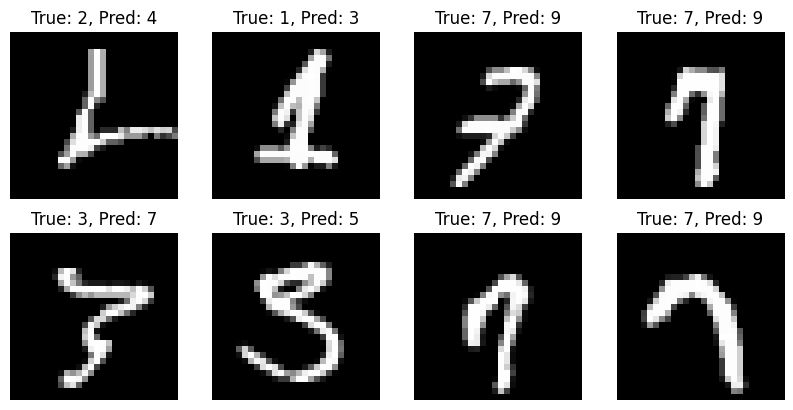

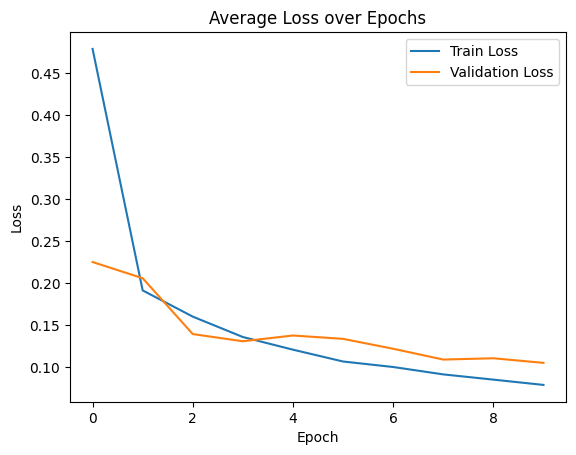

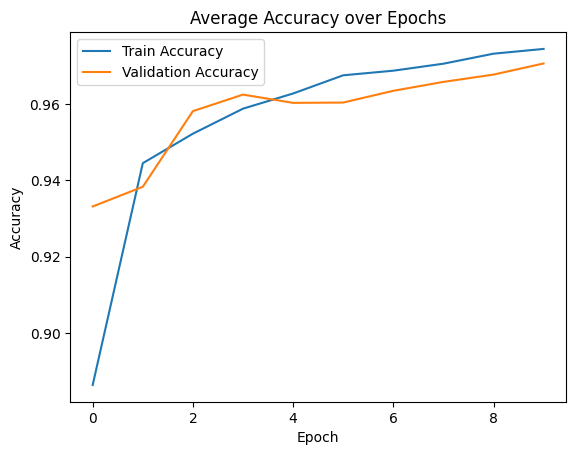

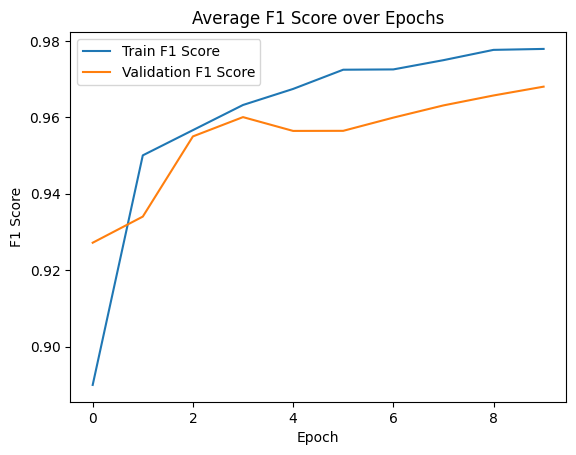

Training Time: 162.6924946308136 seconds


In [ ]:
start = time.time()
with tf.compat.v1.Session(config=config) as Sess:
    Sess.run(Init)
    for epoch in range(1, NumEpochs + 1):
        print(f'Epoch {epoch}')
        epoch_train_losses = []
        epoch_train_accuracies = []
        epoch_train_f1 = []
        epoch_val_losses = []
        epoch_val_accuracies = []
        epoch_val_f1 = []

        # Shuffle indices at the beginning of each epoch
        indices = np.arange(train_features.shape[0])
        np.random.shuffle(indices)
        batches = [indices[i:i + BatchLength] for i in range(0, len(indices), BatchLength)]

        for batch_index in batches:
            batch_xs = train_features[batch_index, :]
            batch_ys = train_labels[batch_index, :]
            batch_xs = np.reshape(batch_xs, [BatchLength, 28, 28, 1])
            _, Acc, L = Sess.run([Optimizer, Accuracy, Loss], feed_dict={InputData: batch_xs, OneHotLabels: batch_ys})

            epoch_train_losses.append(L)
            epoch_train_accuracies.append(Acc)

            # Calculate F1 score for training batch
            batch_pred = Sess.run(FC2, feed_dict={InputData: batch_xs})
            batch_pred = np.argmax(batch_pred, axis=1)
            batch_true = np.argmax(batch_ys, axis=1)
            f1 = f1_score(batch_true, batch_pred, average='macro')
            epoch_train_f1.append(f1)

        # Calculate average training loss, accuracy, and F1 for the epoch
        average_train_loss = np.mean(epoch_train_losses)
        average_train_accuracy = np.mean(epoch_train_accuracies)
        average_train_f1 = np.mean(epoch_train_f1)

        # Add average training loss, accuracy, and F1 to the lists
        train_loss_history.append(average_train_loss)
        train_accuracy_history.append(average_train_accuracy)
        train_f1_history.append(average_train_f1)

        # Evaluate on validation set
        val_predictions = []
        val_true_labels = []
        for i in range(0, len(val_features), BatchLength):
            batch_xs = val_features[i:i + BatchLength]
            batch_ys = val_labels[i:i + BatchLength]
            batch_xs = np.reshape(batch_xs, [-1] + Size)
            batch_ys = np.reshape(batch_ys, [-1, NumClasses])

            val_loss, val_acc = Sess.run([Loss, Accuracy], feed_dict={InputData: batch_xs, OneHotLabels: batch_ys})
            epoch_val_losses.append(val_loss)
            epoch_val_accuracies.append(val_acc)

            # Calculate F1 score for validation batch
            batch_pred = Sess.run(FC2, feed_dict={InputData: batch_xs})
            batch_pred = np.argmax(batch_pred, axis=1)
            batch_true = np.argmax(batch_ys, axis=1)
            f1 = f1_score(batch_true, batch_pred, average='macro')
            epoch_val_f1.append(f1)

        # Calculate average validation loss, accuracy, and F1 for the epoch
        average_val_loss = np.mean(epoch_val_losses)
        average_val_accuracy = np.mean(epoch_val_accuracies)
        average_val_f1 = np.mean(epoch_val_f1)

        # Add average validation loss, accuracy, and F1 to the lists
        val_loss_history.append(average_val_loss)
        val_accuracy_history.append(average_val_accuracy)
        val_f1_history.append(average_val_f1)

        print(f'Average Train Loss: {average_train_loss}, Average Train Accuracy: {average_train_accuracy}, Average Train F1: {average_train_f1}')
        print(f'Average Validation Loss: {average_val_loss}, Average Validation Accuracy: {average_val_accuracy}, Average Validation F1: {average_val_f1}')

        # Early stopping check
        if average_val_loss < best_val_loss:
            best_val_loss = average_val_loss
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= early_stopping_patience:
                print("Early stopping triggered")
                break
    end = time.time()
    # Calculate accuracy and F1 score on the test set
    predictions = []
    true_labels = []
    for i in range(testFeatures.shape[0]):
        input_image = testFeatures[i, :]
        true_label = np.argmax(testLabels[i, :])
        input_image = np.reshape(input_image, [1] + Size)
        prediction = np.argmax(Sess.run(FC2, feed_dict={InputData: input_image}), axis=1)
        predictions.append(prediction[0])
        true_labels.append(true_label)

    accuracy = accuracy_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions, average='macro')

    print(f'Final Test Accuracy: {accuracy}')
    print(f'Final Test F1 Score: {f1}')

    # After printing the shape of the output
    print("Output Shape:", FC2.shape)

    # Collect and visualize some misclassified images
    misclassified_indices = [i for i in range(len(predictions)) if predictions[i] != true_labels[i]]
    visualize_indices = np.random.choice(misclassified_indices, 8, replace=False)

    plt.figure(figsize=(10, 10))
    for idx, i in enumerate(visualize_indices):
        plt.subplot(4, 4, idx + 1)
        input_image = testFeatures[i]
        true_label = np.argmax(testLabels[i])
        prediction = predictions[i]
        plt.imshow(np.squeeze(input_image), cmap='gray')
        plt.title(f'True: {true_label}, Pred: {prediction}')
        plt.axis('off')
    plt.show()

# Plot average loss
plt.plot(train_loss_history, label='Train Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Average Loss over Epochs')
plt.legend()
plt.show()

# Plot average accuracy
plt.plot(train_accuracy_history, label='Train Accuracy')
plt.plot(val_accuracy_history, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Average Accuracy over Epochs')
plt.legend()
plt.show()

# Plot average F1 score
plt.plot(train_f1_history, label='Train F1 Score')
plt.plot(val_f1_history, label='Validation F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.title('Average F1 Score over Epochs')
plt.legend()
plt.show()

print(f'Training Time: {end - start} seconds')

# RESULTADOS FINALES

En conclusión, el modelo planteado ha aprendido, y los resultados obtenidos con la red optimizada en el dominio de la frecuencia son aproximadamente un 2\% inferiores en el caso de MNIST, en comparación con los obtenidos en el conjunto de validación del modelo anterior. Los tiempos de entrenamiento son similares, debido también a la simplicidad de los problemas planteados. Sin embargo, este nuevo modelo realiza menos operaciones que una arquitectura clásica, lo que puede contribuir a la eficiencia en términos de procesamiento.

Esta implementación presenta ciertas limitaciones, como la dificultad para incorporar técnicas de regularización y la falta de flexibilidad en la capa convolucional en términos de padding y stride.

No obstante, este enfoque representa un avance significativo en la línea de investigación de la aceleración del entrenamiento en CNN. Aunque todavía existen áreas que pueden mejorarse para optimizar su rendimiento y flexibilidad, abre una importante línea de reflexión sobre cuánto se está dispuesto a sacrificar en términos de precisión de los resultados a cambio de una mayor eficiencia computacional en términos de número de operaciones. Esta consideración es crucial para encontrar un equilibrio adecuado entre rendimiento y eficiencia en aplicaciones prácticas.
